In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!unzip gdrive/MyDrive/PoemFinalDataset.zip

In [ ]:
import csv
import glob
import pandas as pd
import os
import numpy as np

In [ ]:
# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!pip install hazm

In [ ]:
!pip install --upgrade tensorflow

In [ ]:
dirpath = "./PoemFinalDataset"
outputpath = 'datasetcsv.csv'
columns_name =["poem","poet"]
output = open(outputpath,'w')
csvout = csv.DictWriter(output,columns_name)
csvout.writeheader()
folders_name = os.listdir(dirpath);

for folder in folders_name:
  # print(folder)
  files = os.listdir(dirpath + '/' + folder)
  # print(files)

  for f in files :
    with open(dirpath + '/' + folder + '/' + f,encoding="utf8",errors="ignore")as afile:
      text_file = afile.read().replace('\n',' ')
      row = {'poem': text_file,'poet': folder}
      csvout.writerow(row)
output.close()

In [ ]:
df = pd.read_csv('datasetcsv.csv')
df

,poem,poet
0,آن مه که وفا و حسن سرمایهٔ اوست اوج فلک حسن ک...,abusaeed
1,ای در دل من اصل تمنا همه تو وی در سر من مایهٔ...,abusaeed
2,گفتم صنما لاله رخا دلدارا در خواب نمای چهره با...,abusaeed
3,فردا که زوال شش جهت خواهد بود قدر تو به قدر م...,abusaeed
4,دیریست که تیر فقر را آماجم بر طارم افلاک فلاک...,abusaeed
...,...,...
4598,در مهر ماه زهدم و دینم خراب شد ایمان و کفر من...,sanaee
4599,ای مهر تو بر سینهٔ من مهر نهاده ای عشق تو از ...,sanaee
4600,گر شبی عشق تو بر تخت دلم شاهی کند صدهزاران ما...,sanaee
4601,صنما چبود اگر بوسگکی وام دهی نه برآشوبی هر سا...,sanaee


In [ ]:
# print missing values information
print('missing values stats')
print(df.isnull().sum(), '\n')

# print some missing values
print('some missing values')
print(df[df['poem'].isnull()], '\n')

missing values stats
poem    0
poet    0
dtype: int64 

some missing values
Empty DataFrame
Columns: [poem, poet]
Index: [] 



In [ ]:
import re
import hazm

In [ ]:
normalizer = hazm.Normalizer()
def cleaning(text):
    text = text.strip()
    # normalizing
    text = normalizer.normalize(text)

    # replacing all spaces,hyphens,  with white space
    space_pattern = r"[\xad\ufeff\u200e\u200d\u200b\x7f\u202a\u2003\xa0\u206e\u200c\x9d\]]"
    space_pattern = re.compile(space_pattern)
    text = space_pattern.sub(" ", text)

    # let's delete the un-required elements
    deleted_pattern = r"(\d|[\|\[]]|\"|'ٍ|[0-9]|¬|[a-zA-Z]|[؛“،,”‘۔’’‘–]|[|\.÷+\:\-\?»\=\{}\*«_…\؟!/ـ]|[۲۹۱۷۸۵۶۴۴۳]|[\\u\\x]|[\(\)]|[۰'ٓ۫'ٔ]|[ٓٔ]|[ًٌٍْﹼ،َُِّ«ٰ»ٖء]|\[]|\[\])"
    deleted_pattern = re.compile(deleted_pattern)
    text = deleted_pattern.sub("", text).strip()


    # removing wierd patterns
    wierd_pattern = re.compile("["
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u'\U00010000-\U0010ffff'
        # u"\0x06F0-\0x06F9"
        u"\u200d"
        u"\u200c"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\u3030"
        u"\ufe0f"
        u"\u2069"
        u"\u2066"
        u"\u2068"
        u"\u2067"
        "]+", flags=re.UNICODE)

    text = wierd_pattern.sub(r'', text)
    # removing extra spaces, hashtags
    text = re.sub("#", "", text)
    text = re.sub("\s+", " ", text)
    return text

df['cleaned_poems'] = df['poem'].apply(cleaning)
df = df[['cleaned_poems', 'poet']]
df.columns = ['poem', 'poet']
df

,poem,poet
0,آن مه که وفا و حسن سرمایه اوست اوج فلک حسن کمی...,abusaeed
1,ای در دل من اصل تمنا همه تو وی در سر من مایه س...,abusaeed
2,گفتم صنما لاله رخا دلدارا در خواب نمای چهره با...,abusaeed
3,فردا که زوال شش جهت خواهد بود قدر تو به قدر مع...,abusaeed
4,دیریست که تیر فقر را آماجم بر طارم افلاک فلاکت...,abusaeed
...,...,...
4598,در مهر ماه زهدم و دینم خراب شد ایمان و کفر من ...,sanaee
4599,ای مهر تو بر سینه من مهر نهاده ای عشق تو از دی...,sanaee
4600,گر شبی عشق تو بر تخت دلم شاهی کند صدهزاران ماه...,sanaee
4601,صنما چبود اگر بوسگکی وام دهی نه برآشوبی هر ساع...,sanaee


In [ ]:
labels = list(sorted(df['poet'].unique()))
labels

['abusaeed', 'attar', 'hafez', 'moulavi', 'saadi', 'sanaee']

In [ ]:
df['label_id'] = df['poet'].apply(lambda t: labels.index(t))
df

,poem,poet,label_id
0,آن مه که وفا و حسن سرمایه اوست اوج فلک حسن کمی...,abusaeed,0
1,ای در دل من اصل تمنا همه تو وی در سر من مایه س...,abusaeed,0
2,گفتم صنما لاله رخا دلدارا در خواب نمای چهره با...,abusaeed,0
3,فردا که زوال شش جهت خواهد بود قدر تو به قدر مع...,abusaeed,0
4,دیریست که تیر فقر را آماجم بر طارم افلاک فلاکت...,abusaeed,0
...,...,...,...
4598,در مهر ماه زهدم و دینم خراب شد ایمان و کفر من ...,sanaee,5
4599,ای مهر تو بر سینه من مهر نهاده ای عشق تو از دی...,sanaee,5
4600,گر شبی عشق تو بر تخت دلم شاهی کند صدهزاران ماه...,sanaee,5
4601,صنما چبود اگر بوسگکی وام دهی نه برآشوبی هر ساع...,sanaee,5


In [ ]:
def stop_word_importer(file_name):# importing persian stopwords
    with open(file_name, 'r', encoding="utf8") as myfile:
        stop_words = myfile.read().replace('\n', ' ').replace("\u200c","").replace("\ufeff","").replace("."," ").split(' ')# a list of stop words
    return stop_words

In [ ]:
stop_words = stop_word_importer('stop_words.txt') # importing stop words to a list

In [ ]:
from hazm import stopwords_list

def removeStopWords(text):
  text = ' '.join([word for word in text.split() if word not in stopwords_list()])
  text = ' '.join([word for word in text.split() if word not in stop_words])
  return text

df['cleaned_poems'] = df['poem'].apply(removeStopWords)
df = df[['cleaned_poems', 'poet']]
df.columns = ['poem', 'poet']
df


,poem,poet
0,مه وفا حسن سرمایه اوج فلک حسن کمین پایه خورشید...,abusaeed
1,دل اصل تمنا مایه سودا روزگار نگرم تویی,abusaeed
2,صنما لاله رخا دلدارا خواب نمای چهره باری یارا ...,abusaeed
3,زوال معرفت حسن صفت کوش جزا حشر صفت,abusaeed
4,دیریست تیر فقر آماجم طارم افلاک فلاکت تاجم شمه...,abusaeed
...,...,...
4598,مهر ماه زهدم دینم خراب ایمان کفر شراب زهدم منا...,sanaee
4599,مهر سینه مهر نهاده عشق آب گشاده کمر بندگی احرا...,sanaee
4600,شبی عشق تخت شاهی صدهزاران ماه شب خدمت ماهی لطف...,sanaee
4601,صنما چبود بوسگکی وام برآشوبی ساعت دشنام دام گش...,sanaee


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from keras.models import Sequential
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
# from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
# from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping

In [ ]:
from keras.utils import pad_sequences

In [ ]:
MAX_NB_WORDS = 10000
MAX_SEQUENCE_LENGTH = 256
EMBEDDING_DIM = 100
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~')
tokenizer.fit_on_texts(df['poem'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 23345 unique tokens.


In [ ]:
X = tokenizer.texts_to_sequences(df['poem'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (4603, 256)


In [ ]:
Y = pd.get_dummies(df['poet']).values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (4603, 6)


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(3682, 256) (3682, 6)
(921, 256) (921, 6)


In [ ]:
import tensorflow as tf
loss = tf.keras.losses.CategoricalCrossentropy()

In [ ]:
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(6, activation='softmax'))
model.compile(loss=loss, optimizer='adam', metrics=['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 256, 100)          1000000   
                                                                 
 spatial_dropout1d (Spatial  (None, 256, 100)          0         
 Dropout1D)                                                      
                                                                 
 lstm (LSTM)                 (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 6)                 606       
                                                                 
Total params: 1081006 (4.12 MB)
Trainable params: 1081006 (4.12 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
epochs = 5
batch_size = 32

history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1, callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Epoch 1/5
104/104 [==============================] - 168s 2s/step - loss: 1.3660 - accuracy: 0.3900 - val_loss: 1.0449 - val_accuracy: 0.5149
Epoch 2/5
104/104 [==============================] - 145s 1s/step - loss: 0.7360 - accuracy: 0.7096 - val_loss: 0.6277 - val_accuracy: 0.7344
Epoch 3/5
104/104 [==============================] - 138s 1s/step - loss: 0.3396 - accuracy: 0.8765 - val_loss: 0.6214 - val_accuracy: 0.7453
Epoch 4/5
104/104 [==============================] - 136s 1s/step - loss: 0.1512 - accuracy: 0.9487 - val_loss: 0.6902 - val_accuracy: 0.7398
Epoch 5/5
104/104 [==============================] - 134s 1s/step - loss: 0.0569 - accuracy: 0.9840 - val_loss: 0.7560 - val_accuracy: 0.7398


In [ ]:
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

29/29 [==============================] - 3s 100ms/step - loss: 0.8257 - accuracy: 0.7286
Test set
  Loss: 0.826
  Accuracy: 0.729


In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

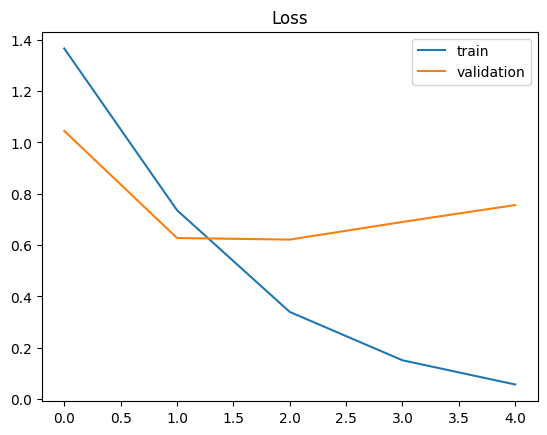

In [ ]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.show();

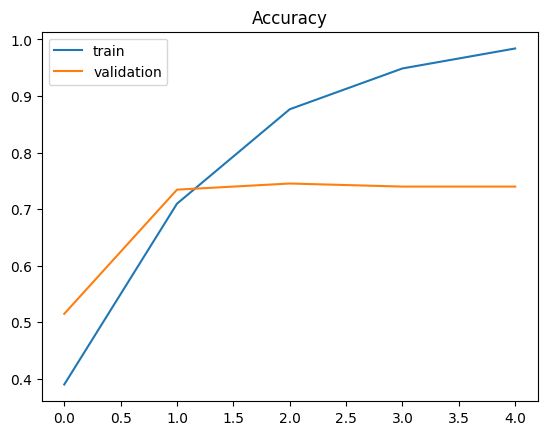

In [ ]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.legend()
plt.show();

In [ ]:
predictions = model.predict(X_test)
predictions.tolist()

In [ ]:
labelsdf = pd.DataFrame(Y_test)

In [ ]:
ldf = pd.from_dummies(labelsdf)
ldf = ldf.values.tolist()
ldf

In [ ]:
Y_pred = predictions.argmax(axis=-1).tolist()
Y_pred

In [ ]:
from sklearn.metrics import classification_report

print()
print(classification_report(ldf, Y_pred, target_names=labels))
print()


              precision    recall  f1-score   support

    abusaeed       0.55      0.64      0.59       164
       attar       0.74      0.76      0.75       232
       hafez       0.99      0.98      0.98        90
     moulavi       0.70      0.58      0.63       257
       saadi       0.93      0.94      0.94        87
      sanaee       0.68      0.79      0.73        91

    accuracy                           0.73       921
   macro avg       0.77      0.78      0.77       921
weighted avg       0.73      0.73      0.73       921




In [ ]:
from sklearn.metrics import f1_score
print(f'F1: {f1_score(ldf, Y_pred, average="weighted")}')

F1: 0.7280126239937567


<Axes: >

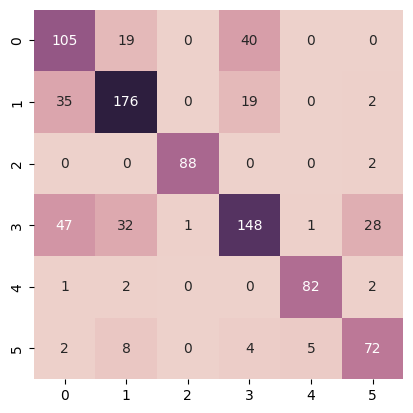

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sb
matrix_confusion = confusion_matrix(ldf, Y_pred)
sb.heatmap(matrix_confusion, square=True, annot=True, cmap=sb.cubehelix_palette(as_cmap=True)
, fmt='d', cbar=False)

In [ ]:
save_path = "/content/gdrive/MyDrive/GhazalRobaeeLSTM"

In [ ]:
model.save(save_path)